In [2]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------------------- ------- 501.8/626.3 kB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00


In [18]:
pip install tensorflow tensorflow-text transformers

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text


In [19]:
pip install torch torchvision


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5c/01/5ab75f138bf32d7a69df61e4997e24eccad87cc009f5fb7e2a31af8a4036/torch-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/c6/75/d869f600fc33df8b8ca99943e165a4ca23b73c68dc1942098fde0a6b46f3/torchvision-0.17.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.5/198.6 MB 16.3 MB/s eta 0:00:13
   ---------------------------------------- 1.3/198.6 MB 16.5 MB/s eta 0:00:12
   ---------------------------------------- 2.1/198.6 MB 17.0 MB/s eta 0:00:12
    ---------------------------------------

In [20]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [8]:
import json
import csv
from textblob import TextBlob
from collections import Counter
from transformers import pipeline

C:\Users\bhavp\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [9]:
classifier = pipeline("zero-shot-classification")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [10]:
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0.5:
        return 'Very Positive'
    elif 0.1 <= analysis.sentiment.polarity <= 0.5:
        return 'Positive'
    elif -0.1 <= analysis.sentiment.polarity < 0.1:
        return 'Neutral'
    elif -0.5 <= analysis.sentiment.polarity < -0.1:
        return 'Negative'
    elif analysis.sentiment.polarity < -0.5:
        return 'Very Negative'

In [11]:

def label_topic(post):
    topics = [ "Healthcare", "Education", "Economy", "Trade", "Poverty", "Energy",
    "Climate Change", "Environment", "Sustainability", "Water", "Food Security",
    "Human Rights", "War and Conflict", "Peacekeeping", "Security", "Cybersecurity",
    "Diplomacy", "Foreign Policy", "International Relations", "Global Governance",
    "Development", "Humanitarian Aid", "Migration", "Refugees", "Demographics",
    "Globalization", "Technology", "Innovation", "Artificial Intelligence",
    "Space Exploration", "Oceans", "Arctic", "Antarctica", "Disarmament",
    "Nuclear Weapons", "Non-Proliferation", "Chemical Weapons", "Biological Weapons",
    "Public Health", "Pandemics", "HIV/AIDS", "Malaria", "Tuberculosis",
    "Mental Health", "Maternal Health", "Child Health", "Non-Communicable Diseases",
    "Universal Health Coverage", "United Nations", "World Health Organization",
    "World Trade Organization", "International Monetary Fund", "World Bank",
    "G20", "BRICS", "NATO", "European Union", "African Union", "Arab League",
    "Association of Southeast Asian Nations", "Organization of American States",
    "Xi Jinping", "Joe Biden", "Donald Trump", "Vladimir Putin", "Narendra Modi",
    "Angela Merkel", "Emmanuel Macron", "Boris Johnson", "Jair Bolsonaro"]
    result = classifier(post['Title'], topics)
    return [result['labels'][0]]


In [12]:
with open('data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
total_comments = 0
overall_sentiments = {'Very Positive': 0,'Positive': 0, 'Neutral': 0, 'Negative': 0, 'Very Negative': 0}

In [13]:
tag_counter = Counter()

tag_sentiments = {}


In [26]:

for i, post in enumerate(data):
    sentiments = {'Very Positive': 0,'Positive': 0, 'Neutral': 0, 'Negative': 0, 'Very Negative': 0}
    comments = post['Comments']
    for comment in comments:
        sentiment = analyze_sentiment(comment)
        sentiments[sentiment] += 1
        overall_sentiments[sentiment] += 1
    total_comments += len(comments)
    topics = label_topic(post)
    for topic in topics:
        tag_counter.update([topic])
        if topic not in tag_sentiments:
            tag_sentiments[topic] = {'Very Positive': 0,'Positive': 0, 'Neutral': 0, 'Negative': 0, 'Very Negative': 0}
        tag_sentiments[topic][sentiment] += 1
    print(f"Post {i+1} comment count: {len(comments)}, Topics: {topics}")
    print(f"Sentiment analysis for post {i+1}: {sentiments}")

print(f"Total comments across the top 5 posts: {total_comments}")
print(f"Overall sentiment analysis: {overall_sentiments}")


Post 1 comment count: 70, Topics: ['Joe Biden']
Sentiment analysis for post 1: {'Very Positive': 1, 'Positive': 17, 'Neutral': 39, 'Negative': 11, 'Very Negative': 2}
Post 2 comment count: 78, Topics: ['Demographics']
Sentiment analysis for post 2: {'Very Positive': 2, 'Positive': 21, 'Neutral': 49, 'Negative': 5, 'Very Negative': 1}
Post 3 comment count: 81, Topics: ['Donald Trump']
Sentiment analysis for post 3: {'Very Positive': 8, 'Positive': 23, 'Neutral': 34, 'Negative': 11, 'Very Negative': 5}
Post 4 comment count: 86, Topics: ['Donald Trump']
Sentiment analysis for post 4: {'Very Positive': 6, 'Positive': 21, 'Neutral': 44, 'Negative': 12, 'Very Negative': 3}
Post 5 comment count: 74, Topics: ['Joe Biden']
Sentiment analysis for post 5: {'Very Positive': 5, 'Positive': 13, 'Neutral': 42, 'Negative': 11, 'Very Negative': 3}
Post 6 comment count: 83, Topics: ['Donald Trump']
Sentiment analysis for post 6: {'Very Positive': 3, 'Positive': 13, 'Neutral': 49, 'Negative': 15, 'Very N

Post 50 comment count: 90, Topics: ['Donald Trump']
Sentiment analysis for post 50: {'Very Positive': 5, 'Positive': 27, 'Neutral': 45, 'Negative': 13, 'Very Negative': 0}
Post 51 comment count: 91, Topics: ['Joe Biden']
Sentiment analysis for post 51: {'Very Positive': 7, 'Positive': 27, 'Neutral': 47, 'Negative': 8, 'Very Negative': 2}
Post 52 comment count: 82, Topics: ['War and Conflict']
Sentiment analysis for post 52: {'Very Positive': 1, 'Positive': 22, 'Neutral': 43, 'Negative': 14, 'Very Negative': 2}
Post 53 comment count: 80, Topics: ['Public Health']
Sentiment analysis for post 53: {'Very Positive': 1, 'Positive': 19, 'Neutral': 45, 'Negative': 12, 'Very Negative': 3}
Post 54 comment count: 87, Topics: ['Donald Trump']
Sentiment analysis for post 54: {'Very Positive': 1, 'Positive': 21, 'Neutral': 49, 'Negative': 13, 'Very Negative': 3}
Post 55 comment count: 79, Topics: ['Donald Trump']
Sentiment analysis for post 55: {'Very Positive': 5, 'Positive': 20, 'Neutral': 47, 'Ne

Post 99 comment count: 80, Topics: ['Donald Trump']
Sentiment analysis for post 99: {'Very Positive': 2, 'Positive': 18, 'Neutral': 48, 'Negative': 12, 'Very Negative': 0}
Post 100 comment count: 76, Topics: ['Donald Trump']
Sentiment analysis for post 100: {'Very Positive': 4, 'Positive': 23, 'Neutral': 29, 'Negative': 18, 'Very Negative': 2}
Total comments across the top 5 posts: 8034
Overall sentiment analysis: {'Very Positive': 381, 'Positive': 2178, 'Neutral': 4082, 'Negative': 1203, 'Very Negative': 190}


In [27]:
top_tags = tag_counter.most_common(15)
print("Sentiment analysis for top 15 tags:")
for tag, _ in top_tags:
    print(f"{tag}: {tag_sentiments[tag]}")

Sentiment analysis for top 15 tags:
Donald Trump: {'Very Positive': 2, 'Positive': 8, 'Neutral': 14, 'Negative': 5, 'Very Negative': 2}
Joe Biden: {'Very Positive': 0, 'Positive': 4, 'Neutral': 8, 'Negative': 3, 'Very Negative': 0}
Security: {'Very Positive': 0, 'Positive': 1, 'Neutral': 5, 'Negative': 3, 'Very Negative': 0}
Demographics: {'Very Positive': 0, 'Positive': 2, 'Neutral': 4, 'Negative': 1, 'Very Negative': 0}
Trade: {'Very Positive': 0, 'Positive': 1, 'Neutral': 3, 'Negative': 1, 'Very Negative': 0}
Innovation: {'Very Positive': 0, 'Positive': 1, 'Neutral': 2, 'Negative': 1, 'Very Negative': 0}
Economy: {'Very Positive': 0, 'Positive': 1, 'Neutral': 2, 'Negative': 1, 'Very Negative': 0}
War and Conflict: {'Very Positive': 1, 'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Very Negative': 0}
Sustainability: {'Very Positive': 1, 'Positive': 1, 'Neutral': 0, 'Negative': 0, 'Very Negative': 1}
Development: {'Very Positive': 0, 'Positive': 0, 'Neutral': 2, 'Negative': 1, 'Very Neg

In [32]:
import csv

# Your existing code
with open('sentiment_analysis_results.csv', mode='w', newline='') as file:
    fieldnames = ['Post Number', 'Comment Count', 'Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative', 'Topics']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for i, post in enumerate(data):
        sentiments = {'Very Positive': 0, 'Positive': 0, 'Neutral': 0, 'Negative': 0, 'Very Negative': 0}
        comments = post['Comments']
        for comment in comments:
            sentiment = analyze_sentiment(comment)
            sentiments[sentiment] += 1
            overall_sentiments[sentiment] += 1
        total_comments += len(comments)
        topics = label_topic(post)
        for topic in topics:
            tag_counter.update([topic])
            if topic not in tag_sentiments:
                tag_sentiments[topic] = {'Very Positive': 0, 'Positive': 0, 'Neutral': 0, 'Negative': 0, 'Very Negative': 0}
            tag_sentiments[topic][sentiment] += 1

        writer.writerow({
            'Post Number': i + 1,
            'Comment Count': len(comments),
            'Very Positive': sentiments['Very Positive'],
            'Positive': sentiments['Positive'],
            'Neutral': sentiments['Neutral'],
            'Negative': sentiments['Negative'],
            'Very Negative': sentiments['Very Negative'],
            'Topics': topics
        })

    writer.writerow({
        'Post Number': 'Total',
        'Comment Count': total_comments,
        'Very Positive': overall_sentiments['Very Positive'],
        'Positive': overall_sentiments['Positive'],
        'Neutral': overall_sentiments['Neutral'],
        'Negative': overall_sentiments['Negative'],
        'Very Negative': overall_sentiments['Very Negative']
    })

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'")


Sentiment analysis results saved to 'sentiment_analysis_results.csv'


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('sentiment_analysis_results.csv')
data.head()

,Post Number,Comment Count,Very Positive,Positive,Neutral,Negative,Very Negative,Topics
0,1,70,1,17,39,11,2,['Joe Biden']
1,2,78,2,21,49,5,1,['Demographics']
2,3,81,8,23,34,11,5,['Donald Trump']
3,4,86,6,21,44,12,3,['Donald Trump']
4,5,74,5,13,42,11,3,['Joe Biden']


In [5]:
print(df.shape)

(101, 8)


In [29]:
data = data.iloc[:-1]

<Figure size 1400x800 with 0 Axes>

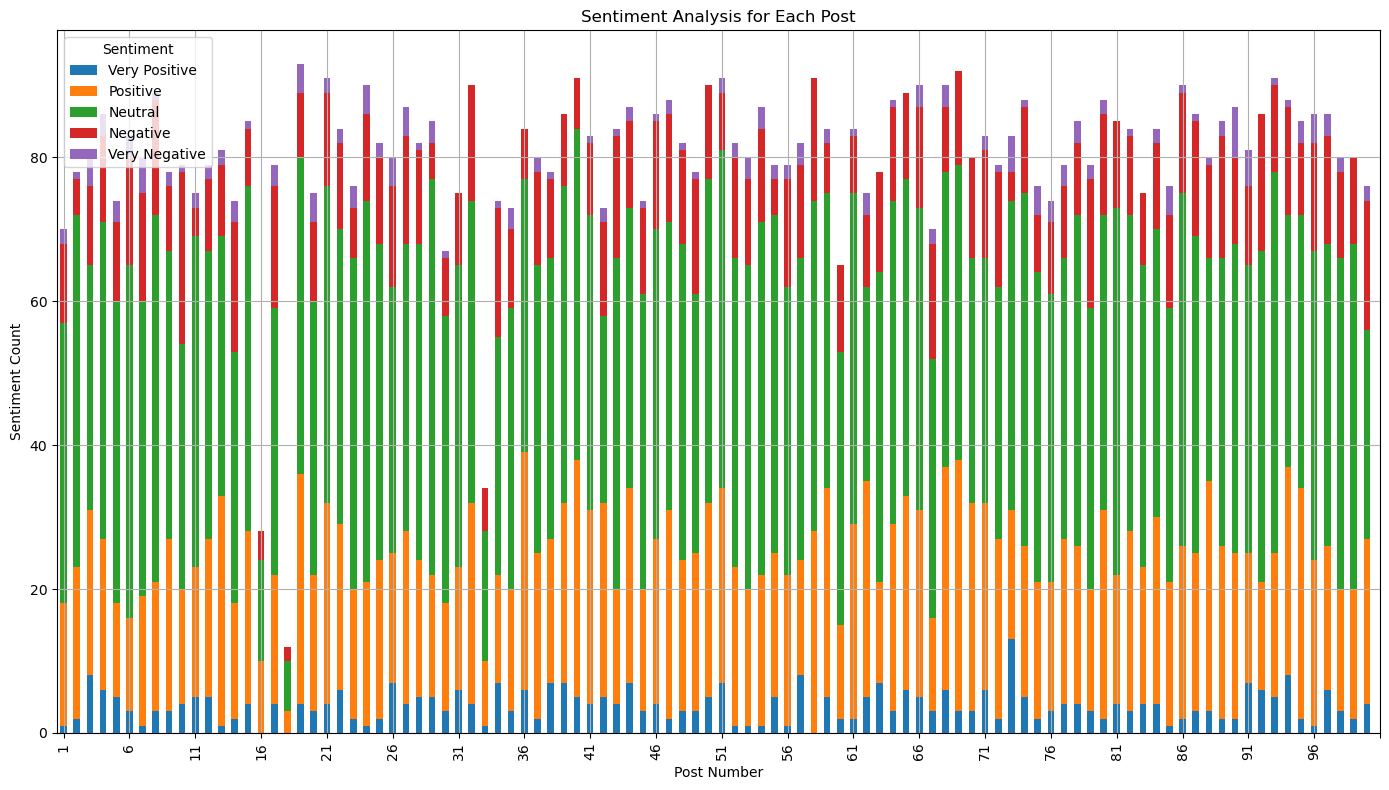

In [32]:
# Selecting the relevant columns
data = data[['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']]

# Plotting
plt.figure(figsize=(14, 8))
data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sentiment Analysis for Each Post')
plt.xlabel('Post Number')
plt.ylabel('Sentiment Count')
plt.legend(title='Sentiment')
plt.grid(True)
plt.xticks(range(0, 101, 5))  # Adjust the ticks based on your data
plt.tight_layout()
plt.show()